<a href="https://colab.research.google.com/github/andres456s/AlgorithmsUN2023II/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install fortran-magic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.9 MB/s eta 0:00:00


In [14]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [15]:
assert ran_the_first_cell, "Oh noes!"

In [16]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [17]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [18]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [19]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [20]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [21]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [22]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [23]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [24]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [25]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [26]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [27]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [28]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [29]:
# No slicing.
#philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [30]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [31]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [32]:
%%time

matmul(a, b)

CPU times: user 71 µs, sys: 0 ns, total: 71 µs
Wall time: 2.69 ms


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [33]:
# !cat /proc/cpuinfo

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [34]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out


**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [35]:
#matmul(a,b)

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [36]:
def matmul(A, B):
    if len(A[0]) == len(B):
      print('the Condition is FALSE')
      """Multiply matrix A by matrix B."""
      rows_out = len(A)
      cols_out = len(B[0])
      out = [[0 for col in range(cols_out)] for row in range(rows_out)]

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      print('the Condition is TRUE the row ando columns are difernts')
      return

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [37]:
matmul(a,b)

the Condition is TRUE the row ando columns are difernts


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [38]:
A=[[1,2,3],[1,2,3]]
B=[[1,2,3],[1,2,3],[1,2,3]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [39]:
matmul(A,B)

the Condition is FALSE


[[6, 12, 18], [6, 12, 18]]

In [40]:
import random

In [41]:
random.normalvariate(0,1)

-0.3475733217531314

In [42]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.39584530218808067, 0.12843134721560978, 0.5641852147862657],
 [0.01942159686281375, 0.11897866067690976, 0.2922972150077878]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [43]:
import time

randb=random_matrix(600,100)
randa=random_matrix(100,600)

def l0Times(randa,randb):
  St=0
  for i in range (10):
    t0=time.time()
    matmul(randa,randb)
    tn=time.time()
    t=tn-t0
    St +=t


  return St/10


In [44]:
print(l0Times(randa,randb))

the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
3.23861768245697


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [45]:
import pandas as pd

tm_ex = pd.DataFrame(columns=['lenguaje', 'Average secs','Speed factor'])

def aped(media,Nombre):
  global tm_ex

  nw_data= {'lenguaje':Nombre,'Average secs':media }
  tm_ex=tm_ex.append(nw_data,ignore_index=True)
  return tm_ex

print(aped(l0Times(randa,randb),'Python'))

the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
the Condition is FALSE
  lenguaje  Average secs Speed factor
0   Python      3.384156          NaN


<ipython-input-45-95f4692019e3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tm_ex=tm_ex.append(nw_data,ignore_index=True)


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [46]:
import numpy as np


def l0Timesnp(randa,randb):
  St=0
  for i in range (10):
    t0=time.time()
    np.dot(randa,randb)
    tn=time.time()
    t=tn-t0
    St +=t


  return St/10
  #agregar numpy


print(aped(l0Timesnp(randa,randb),'Numpy'))




  lenguaje  Average secs Speed factor
0   Python      3.384156          NaN
1    Numpy      0.021170          NaN


<ipython-input-45-95f4692019e3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tm_ex=tm_ex.append(nw_data,ignore_index=True)


In [47]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

the Condition is FALSE
CPU times: user 10.8 s, sys: 85.5 ms, total: 10.9 s
Wall time: 11.8 s


In [48]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [49]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [50]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [51]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 13.2 ms


333328333350000.0

In [52]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 210 µs, sys: 0 ns, total: 210 µs
Wall time: 220 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [53]:
dA= random_matrix(2,2)
dB= random_matrix(2,2)

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [54]:
%%fortran
subroutine matmul_f(mat1, mat2, RTA)
        real, intent(in) :: mat1(2,2), mat2(2,2)
        real, intent(out) :: RTA(2,2)
        integer :: i, j, k

        do i = 1, 2
            do j = 1, 2
                RTA(i, j) = 0.0
                do k = 1, 2
                    RTA(i, j) = RTA(i, j) + mat1(i, k) * mat2(k, j)
                end do
            end do
        end do
end


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [55]:
matmul_f(dA,dB)

array([[0.16010243, 0.34417322],
       [0.5785292 , 0.83691645]], dtype=float32)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [56]:
%%fortran
subroutine matmulb(A,B,N,L,M,R)
    implicit none
    integer, intent(in) :: N,L,M
    double precision, intent(in) :: A(600,*)
    double precision, intent(in) :: B(100,*)
    double precision, intent(out) :: R(N,M)
    integer I,J,K
    do I=1,N
      do J=1,M
        R(I,J)=0
        do K=1,L
          R(I,J) = R(I,J) + A(I,K) * B(K,J)
        end do
      end do
    end do
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [57]:
A1 = random_matrix(600,100)
A2 = random_matrix(100,600)

N=len(A1)
L=len(A1[0])
M=len(A2[0])

matmulb(A1,A2,N,L,M)

array([[26.52223335, 25.83777217, 26.39303191, ..., 26.1687141 ,
        26.59871136, 26.3038133 ],
       [27.16604553, 24.32030382, 25.65312593, ..., 27.13809255,
        25.36353095, 27.83669673],
       [26.60410736, 25.85153219, 25.36349165, ..., 26.4371447 ,
        26.77572826, 27.14312289],
       ...,
       [25.00568199, 22.95696638, 23.37040237, ..., 24.42179053,
        24.27971902, 24.3535474 ],
       [24.53556573, 24.18959283, 25.11122955, ..., 23.59011864,
        25.09288774, 25.09749596],
       [22.66352329, 22.22261366, 23.0650556 , ..., 24.07057946,
        23.99405793, 23.74206509]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [136]:
%%time
for i in range(0,10):
  matmulb(A1,A2,N,L,M)

CPU times: user 607 ms, sys: 6.46 ms, total: 613 ms
Wall time: 872 ms


In [59]:
import time
import random
St=0
for i in range (10):
  t0=time.time()
  matmulb(A1,A2,N,L,M)
  tn=time.time()
  t=tn-t0
  St +=t

res=St/10

print(aped(res,'Fortran_magic'))

        lenguaje  Average secs Speed factor
0         Python      3.384156          NaN
1          Numpy      0.021170          NaN
2  Fortran_magic      0.052409          NaN


<ipython-input-45-95f4692019e3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tm_ex=tm_ex.append(nw_data,ignore_index=True)


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [60]:
def l0Times_fortran(A1,A2,N,L,M):
  St=0
  for i in range (10):
    t0=time.time()
    matmulb(A1,A2,N,L,M)
    tn=time.time()
    t=tn-t0
    St +=t

  res=St/10
  return res

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [61]:
print(l0Times_fortran(A1,A2,N,L,M))

0.04958951473236084


**My own example 18 - Adding Fortran average execution time to the data frame**

In [62]:
print(aped(l0Times_fortran(A1,A2,N,L,M),'Fortran'))

        lenguaje  Average secs Speed factor
0         Python      3.384156          NaN
1          Numpy      0.021170          NaN
2  Fortran_magic      0.052409          NaN
3        Fortran      0.050424          NaN


<ipython-input-45-95f4692019e3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tm_ex=tm_ex.append(nw_data,ignore_index=True)


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [63]:
%%writefile matmulti_c.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

void matrix_multiply(int n, int m, int p, double A[n][m], double B[m][p], double C[n][p]) {
    int i, j, k;

    for (i = 0; i < n; i++) {
        for (j = 0; j < p; j++) {
            C[i][j] = 0.0;
            for (k = 0; k < m; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    int n = 600;
    int m = 100;
    int p = 600;

    double A[n][m];
    double B[m][p];
    double result[n][p];

    for (int i = 0; i < n; i++) {
        for (int j = 0; j < m; j++) {
            A[i][j] = i + j;
        }
    }

    for (int i = 0; i < m; i++) {
        for (int j = 0; j < p; j++) {
            B[i][j] = i * j;
        }
    }
clock_t start_time, end_time;
    double cpu_time_used;

    start_time = clock();

   for (int l = 0; l < 10; l++) {
    matrix_multiply(n, m, p, A, B, result);
}
   end_time = clock();

    cpu_time_used = ((double) (end_time - start_time)) / CLOCKS_PER_SEC;


    printf("%.6f", cpu_time_used);



    return 0;
}


Writing matmulti_c.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [64]:
import subprocess

def copilar_celda(lenguje,file):
  # Compilar y ejecutar el programa usando subprocess
  compile_process = subprocess.Popen([lenguje, file, '-o', 'output'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  compile_output, compile_error = compile_process.communicate()

  if compile_process.returncode == 0:
      execute_process = subprocess.Popen(['./output'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
      execute_output, execute_error = execute_process.communicate()
      output_result = execute_output.decode('utf-8')
      print("Salida del programa:")
      return output_result
  else:
      print("Error en la compilación:")
      return print(compile_error.decode('utf-8'))



In [65]:
copilar_celda('gcc','matmulti_c.c')

Salida del programa:


'2.776226'

**My own example 21 - Adding c average execution time to the data frame**

In [66]:
print(aped(copilar_celda('gcc','matmulti_c.c'),'C'))

Salida del programa:
        lenguaje Average secs Speed factor
0         Python     3.384156          NaN
1          Numpy      0.02117          NaN
2  Fortran_magic     0.052409          NaN
3        Fortran     0.050424          NaN
4              C     2.392087          NaN


<ipython-input-45-95f4692019e3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tm_ex=tm_ex.append(nw_data,ignore_index=True)


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [67]:
%%writefile matmulti_c++.cpp
#include<iostream>
#include<stdlib.h>
#include<time.h>
#include <chrono>
#include <ctime>

using namespace std;
int main()
{

 srand(time(0)); //creacion matriz 1
 int matrix1[600][100], i ,j, matrix2[100][600], k ,l, result [600][600], p;

 for( i = 0; i < 600; ++i)
  {for( j = 0;  j < 100; ++j)
     {matrix1[i][j] = rand()%100;}
  }


//creacion matriz
 for( k = 0; k < 100; ++k)
  {
      for( l = 0;  l < 600; ++l)
     {matrix1[k][l] = rand()%100;}
  }

float mean;
for (p = 0; p<10; p++){
 auto start = std::chrono::system_clock::now();

 for (int m = 0; m <600 ; m++)//multiplicacion matrices
 {
   for (int n = 0; n < 600; n++){

     for (int o = 0; o < 100; o++){

      result[m][n] +=  matrix1[m][o] * matrix2[o][n];

     }

   }

 }
    auto end = std::chrono::system_clock::now();
    std::chrono::duration<double> elapsed_seconds = end-start;
    mean = mean + elapsed_seconds.count();
}
cout<<mean/10;



   return 0;
  }

Writing matmulti_c++.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [68]:
copilar_celda('g++','matmulti_c++.cpp')

Salida del programa:


'0.161074'

**My own example 24 - Adding C++ average execution time to the data frame**

In [69]:
aped(copilar_celda('g++','matmulti_c++.cpp'),'C++')

Salida del programa:


<ipython-input-45-95f4692019e3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tm_ex=tm_ex.append(nw_data,ignore_index=True)


,lenguaje,Average secs,Speed factor
0,Python,3.384156,NaN
1,Numpy,0.02117,NaN
2,Fortran_magic,0.052409,NaN
3,Fortran,0.050424,NaN
4,C,2.392087,NaN
5,C++,0.165317,NaN


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [70]:
%%writefile matmulti_java.java
public class MatrixMultiplication {

    public static void matrixMultiply(int n, int m, int p, double[][] A, double[][] B, double[][] result) {

        for (int i = 0; i < n; i++) {
            for (int j = 0; j < p; j++) {
                result[i][j] = 0;
                for (int k = 0; k < m; k++) {
                    result[i][j] += A[i][k] * B[k][j];
                }
            }
        }
      }

    public static void main(String[] args) {
        final int n = 600;
        final int m = 100;
        final int p = 600;

        double[][] A = new double[n][m];
        double[][] B = new double[m][p];
        double[][] result = new double[n][p];

        // Llena las matrices con valores (solo para ejemplo)
        for (int i = 0; i < n; i++) {
            for (int j = 0; j < m; j++) {
                A[i][j] = i + j;
            }
        }

        for (int i = 0; i < m; i++) {
            for (int j = 0; j < p; j++) {
                B[i][j] = i * j;
            }
        }

        // Llama a la función para multiplicar matrices y calcular el tiempo
 double a= 0.0;
          long mean=0;
        for (int i = 0; i < 10; i++) {

       long inicio = System.currentTimeMillis();
        matrixMultiply(n, m, p, A, B, result);
          long fin = System.currentTimeMillis();
          long tiempo = (long) ((fin - inicio));
          mean = mean + tiempo;
        }
        a=mean/10;
        a= a*0.001;
        System.out.println(a);
    }
}


Writing matmulti_java.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [71]:
copilar_celda('java','matmulti_java.java')

Salida del programa:


'0.200549'

**My own example 27 - Adding Java average execution time to the data frame**

In [72]:
aped(copilar_celda('java','matmulti_java.java'),'JAVA')

Salida del programa:


<ipython-input-45-95f4692019e3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tm_ex=tm_ex.append(nw_data,ignore_index=True)


,lenguaje,Average secs,Speed factor
0,Python,3.384156,NaN
1,Numpy,0.02117,NaN
2,Fortran_magic,0.052409,NaN
3,Fortran,0.050424,NaN
4,C,2.392087,NaN
5,C++,0.165317,NaN
6,JAVA,0.266411,NaN


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [73]:
%%writefile matmulti_js.js
var myArray = []

for (var i = 0; i < 600; i++) {
  a=Array.from({length: 100}, () => Math.floor(Math.random() * 40));
  myArray.push(a)
}

var myArray_2 = []

for (var i = 0; i < 100; i++) {
  a=Array.from({length: 600
  }, () => Math.floor(Math.random() * 40));
  myArray_2.push(a)
}

sum=0
for(i=0; i<10;i++){
    var start = Date.now();
    mult(myArray,myArray_2)
    var end = Date.now();
    sum +=(end-start)
}

console.log(`Average time: ${sum/10} ms`)

function mult(a,b){
 fil_m1 = a.length;
    col_m1 = a[0].length;
    fil_m2 = b.length;
    col_m2 = b[0].length;
    let multiplicacion = new Array(fil_m1);
    for (x=0; x<multiplicacion.length;x++){
        multiplicacion[x] = new Array(col_m2).fill(0);

    }
    for (x=0; x < multiplicacion.length; x++) {
        for (y=0; y < multiplicacion[x].length; y++) {
            for (z=0; z<col_m1; z++) {
                multiplicacion [x][y] += + a[x][z]*b[z][y];
            }
        }
    }
}

Writing matmulti_js.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [74]:
copilar_celda('node','matmulti_js.js')

Salida del programa:


'0.399944'

**My own example 30 - Adding Javascript average execution time to the data frame**

In [75]:
aped(copilar_celda('node','matmulti_js.js'),'Javascript')

Salida del programa:


<ipython-input-45-95f4692019e3>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tm_ex=tm_ex.append(nw_data,ignore_index=True)


,lenguaje,Average secs,Speed factor
0,Python,3.384156,NaN
1,Numpy,0.02117,NaN
2,Fortran_magic,0.052409,NaN
3,Fortran,0.050424,NaN
4,C,2.392087,NaN
5,C++,0.165317,NaN
6,JAVA,0.266411,NaN
7,Javascript,0.454168,NaN


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [76]:
tm_ex['Average secs'] = pd.to_numeric(tm_ex['Average secs'], errors='coerce')

min_mask = tm_ex['Average secs'] == tm_ex['Average secs'].min()

min_rows = tm_ex[min_mask]

print(min_rows)


  lenguaje  Average secs Speed factor
1    Numpy       0.02117          NaN


**My own example 32 - Adding the Speed factor columne to the data frame**

In [77]:
b=tm_ex['Average secs'].min()
lista =[]
for i in range(tm_ex.shape[0]):
  lista.append( (tm_ex.loc[i,'Average secs']) /b)

tm_ex['Speed factor']=lista

tm_ex.head()

,lenguaje,Average secs,Speed factor
0,Python,3.384156,159.856409
1,Numpy,0.021170,1.000000
2,Fortran_magic,0.052409,2.475637
3,Fortran,0.050424,2.381870
4,C,2.392087,112.994337


**My own example 33 - Sorting the the data frame by average execution time**

In [78]:
ordered = tm_ex.sort_values('Average secs')
print(ordered)

        lenguaje  Average secs  Speed factor
1          Numpy      0.021170      1.000000
3        Fortran      0.050424      2.381870
2  Fortran_magic      0.052409      2.475637
5            C++      0.165317      7.809032
6           JAVA      0.266411     12.584381
7     Javascript      0.454168     21.453405
4              C      2.392087    112.994337
0         Python      3.384156    159.856409


## Why is the Python Version so Much Slower?

In [79]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [80]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [81]:
import numpy as np

data = np.array([1, 2, 3, 4])
data
array_data=data

In [82]:
data + data

array([2, 4, 6, 8])

In [83]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 92 µs, sys: 4 µs, total: 96 µs
Wall time: 102 µs


30

In [84]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 42 µs, sys: 0 ns, total: 42 µs
Wall time: 47.2 µs


30

In [85]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 33 µs, sys: 0 ns, total: 33 µs
Wall time: 37.4 µs


30.0

In [86]:
# Numpy won't allow us to write a string into an int array.
#data[0] = "foo"

In [87]:
# We also can't grow an array once it's created.
#data.append(3)

In [88]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [89]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [90]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [91]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [92]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [93]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [94]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [95]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [96]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [97]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [98]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [99]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [100]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [101]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [102]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [103]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [104]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [105]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [106]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [107]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [108]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [109]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [110]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [111]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [112]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [113]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [114]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [115]:
variance(np.random.standard_normal(1000))

1.0219141467773585

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [116]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [117]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [118]:
data.mean()

14.5

In [119]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [120]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [121]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [122]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [123]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [124]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [125]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [126]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [127]:
# ... or by label.
s.loc['a']

1

In [128]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [129]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [130]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [131]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [132]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [133]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [134]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [137]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [138]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Open,High
Date,,
2014-09-29,100.589996,100.690002
2014-10-06,99.949997,102.379997


In [139]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

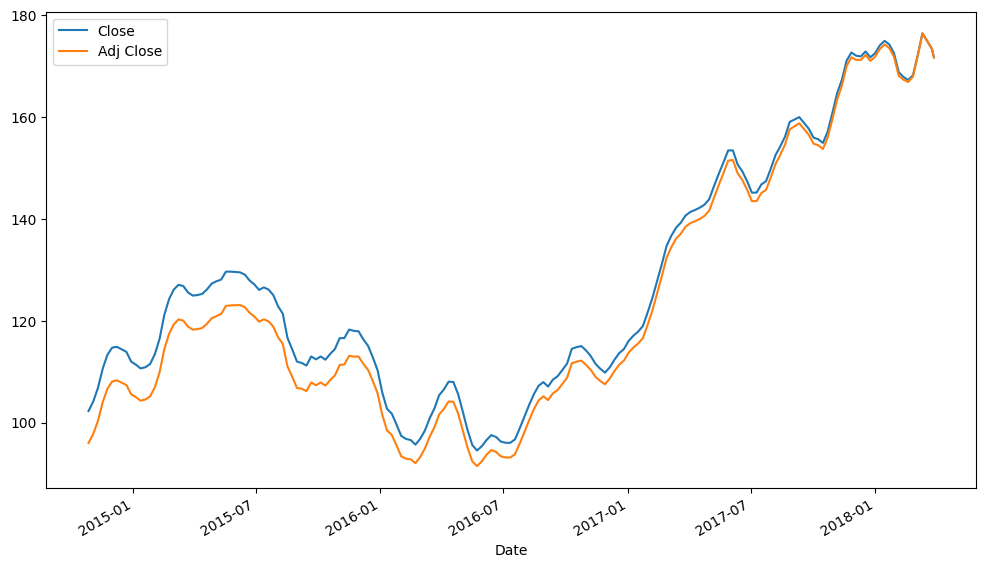

In [140]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

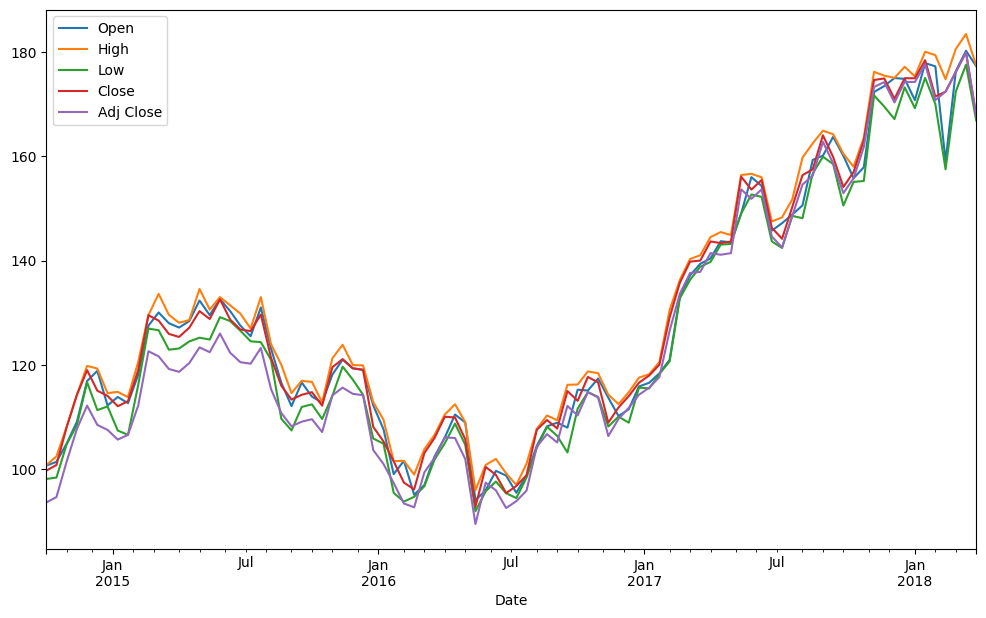

In [141]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

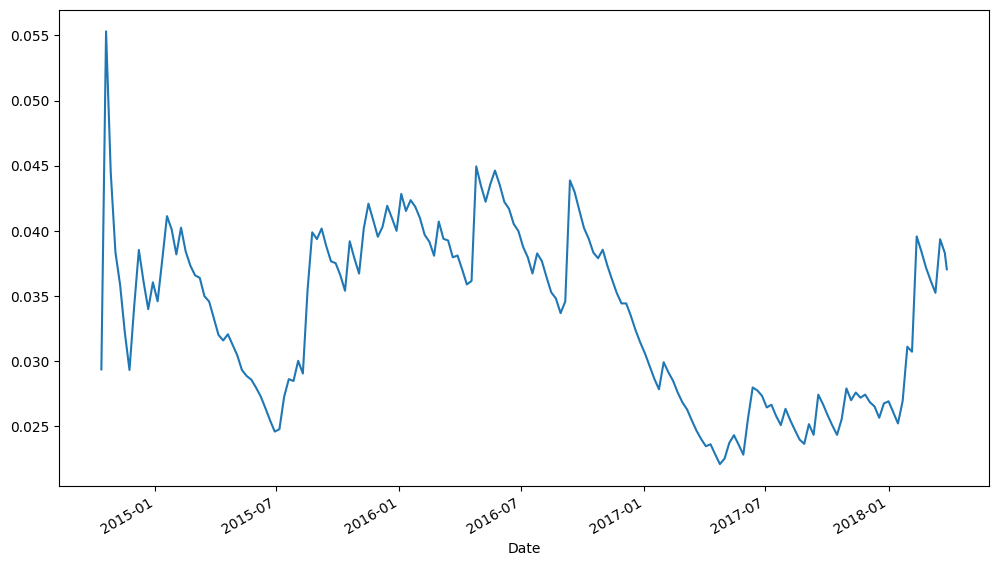

In [142]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [143]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [144]:
avocados = read_avocadata('2014', '2016')
avocados.head()

<ipython-input-143-74fdf899ad9d>:54: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [145]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

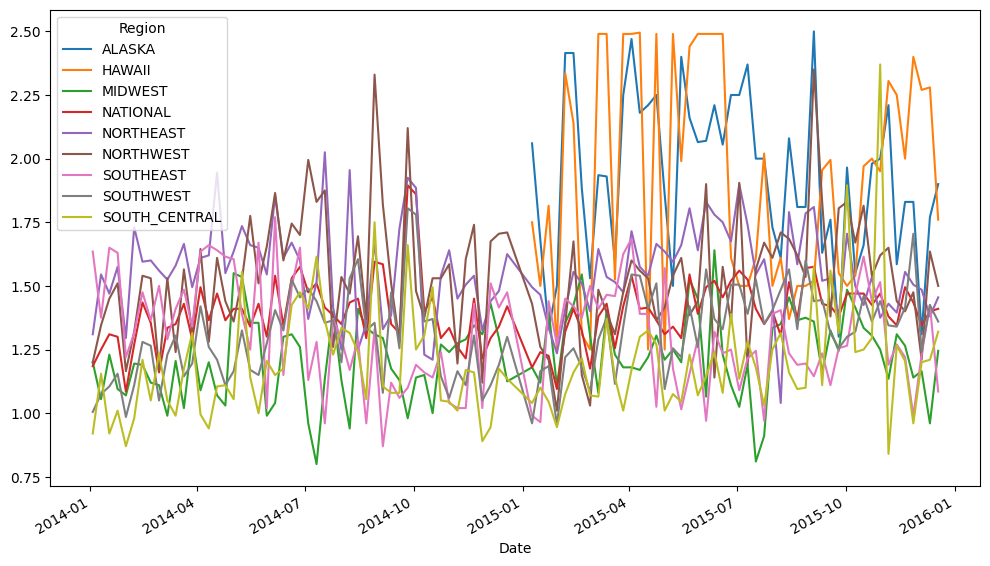

In [146]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [147]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

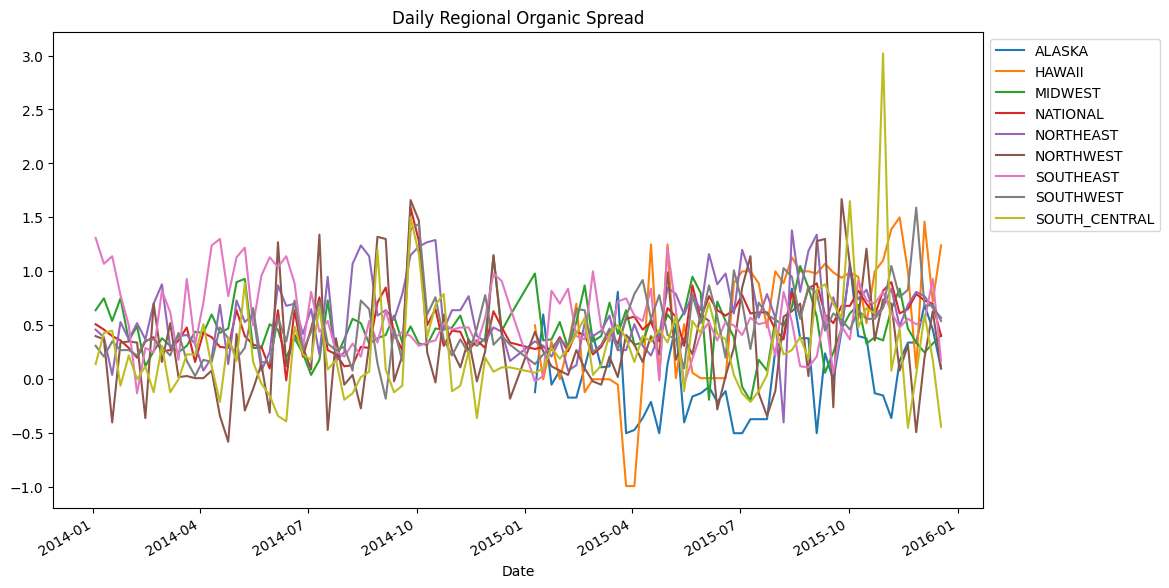

In [148]:
plt=organic_spread_by_region(hass).plot();
plt.set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [149]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


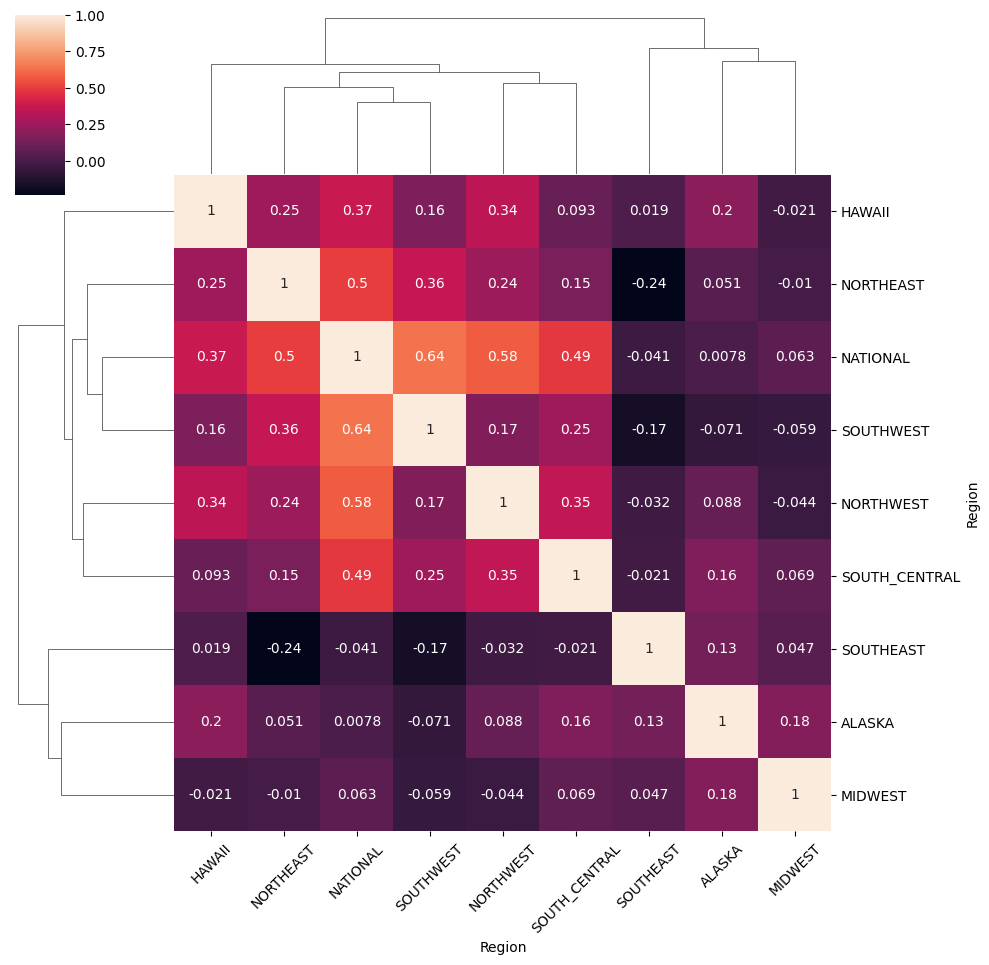

In [150]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!